In [22]:
from src.recommender import ContentRecommender
from src.MIND import MINDSmallData
from src.feature_matrix import CreateFeatureMatrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from prettytable import PrettyTable

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning) # ignore all future warnings

In [184]:
data = news_data.drop(['subtopic', 'abstract', 'link', 'tags1', 'tags2'], axis=1)

In [187]:
data.columns = ['Code', 'Topic', 'Title', 'Body']

In [195]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=20,
                                               stop_words='english', ngram_range=(1,2))
vectorized = tfidf_vectorizer.fit_transform(news_data['content'])

In [44]:
create = CreateFeatureMatrix(news_data, ngram_range=(1,2))

In [205]:
d = pd.read_csv('../data/TFIDF.csv')

In [45]:
create.featurize()

In [47]:
model = create.model

In [48]:
feature_names = create.feature_names

In [165]:
def plot_top_words(model, feature_names, topic_list, n_top_words=10, title='20 words per topic'): # from sklearn documentation

    fig, axes = plt.subplots(3, 5, figsize=(30, 25), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        
        ax.set_title(f'{topic_list[topic_idx]}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show();
    plt.savefig('nmf_15.png')

In [166]:
topic_list = ['1', 'finance', 'basketball/sports',  'football/sports', 'police news/people dying/crime', 'restaurants/holiday food', '7', 'baseball', 'disease/population', '10', 'pop-culture', '12', 'British royalty', 'Trump impeachment', 'health/dieting']

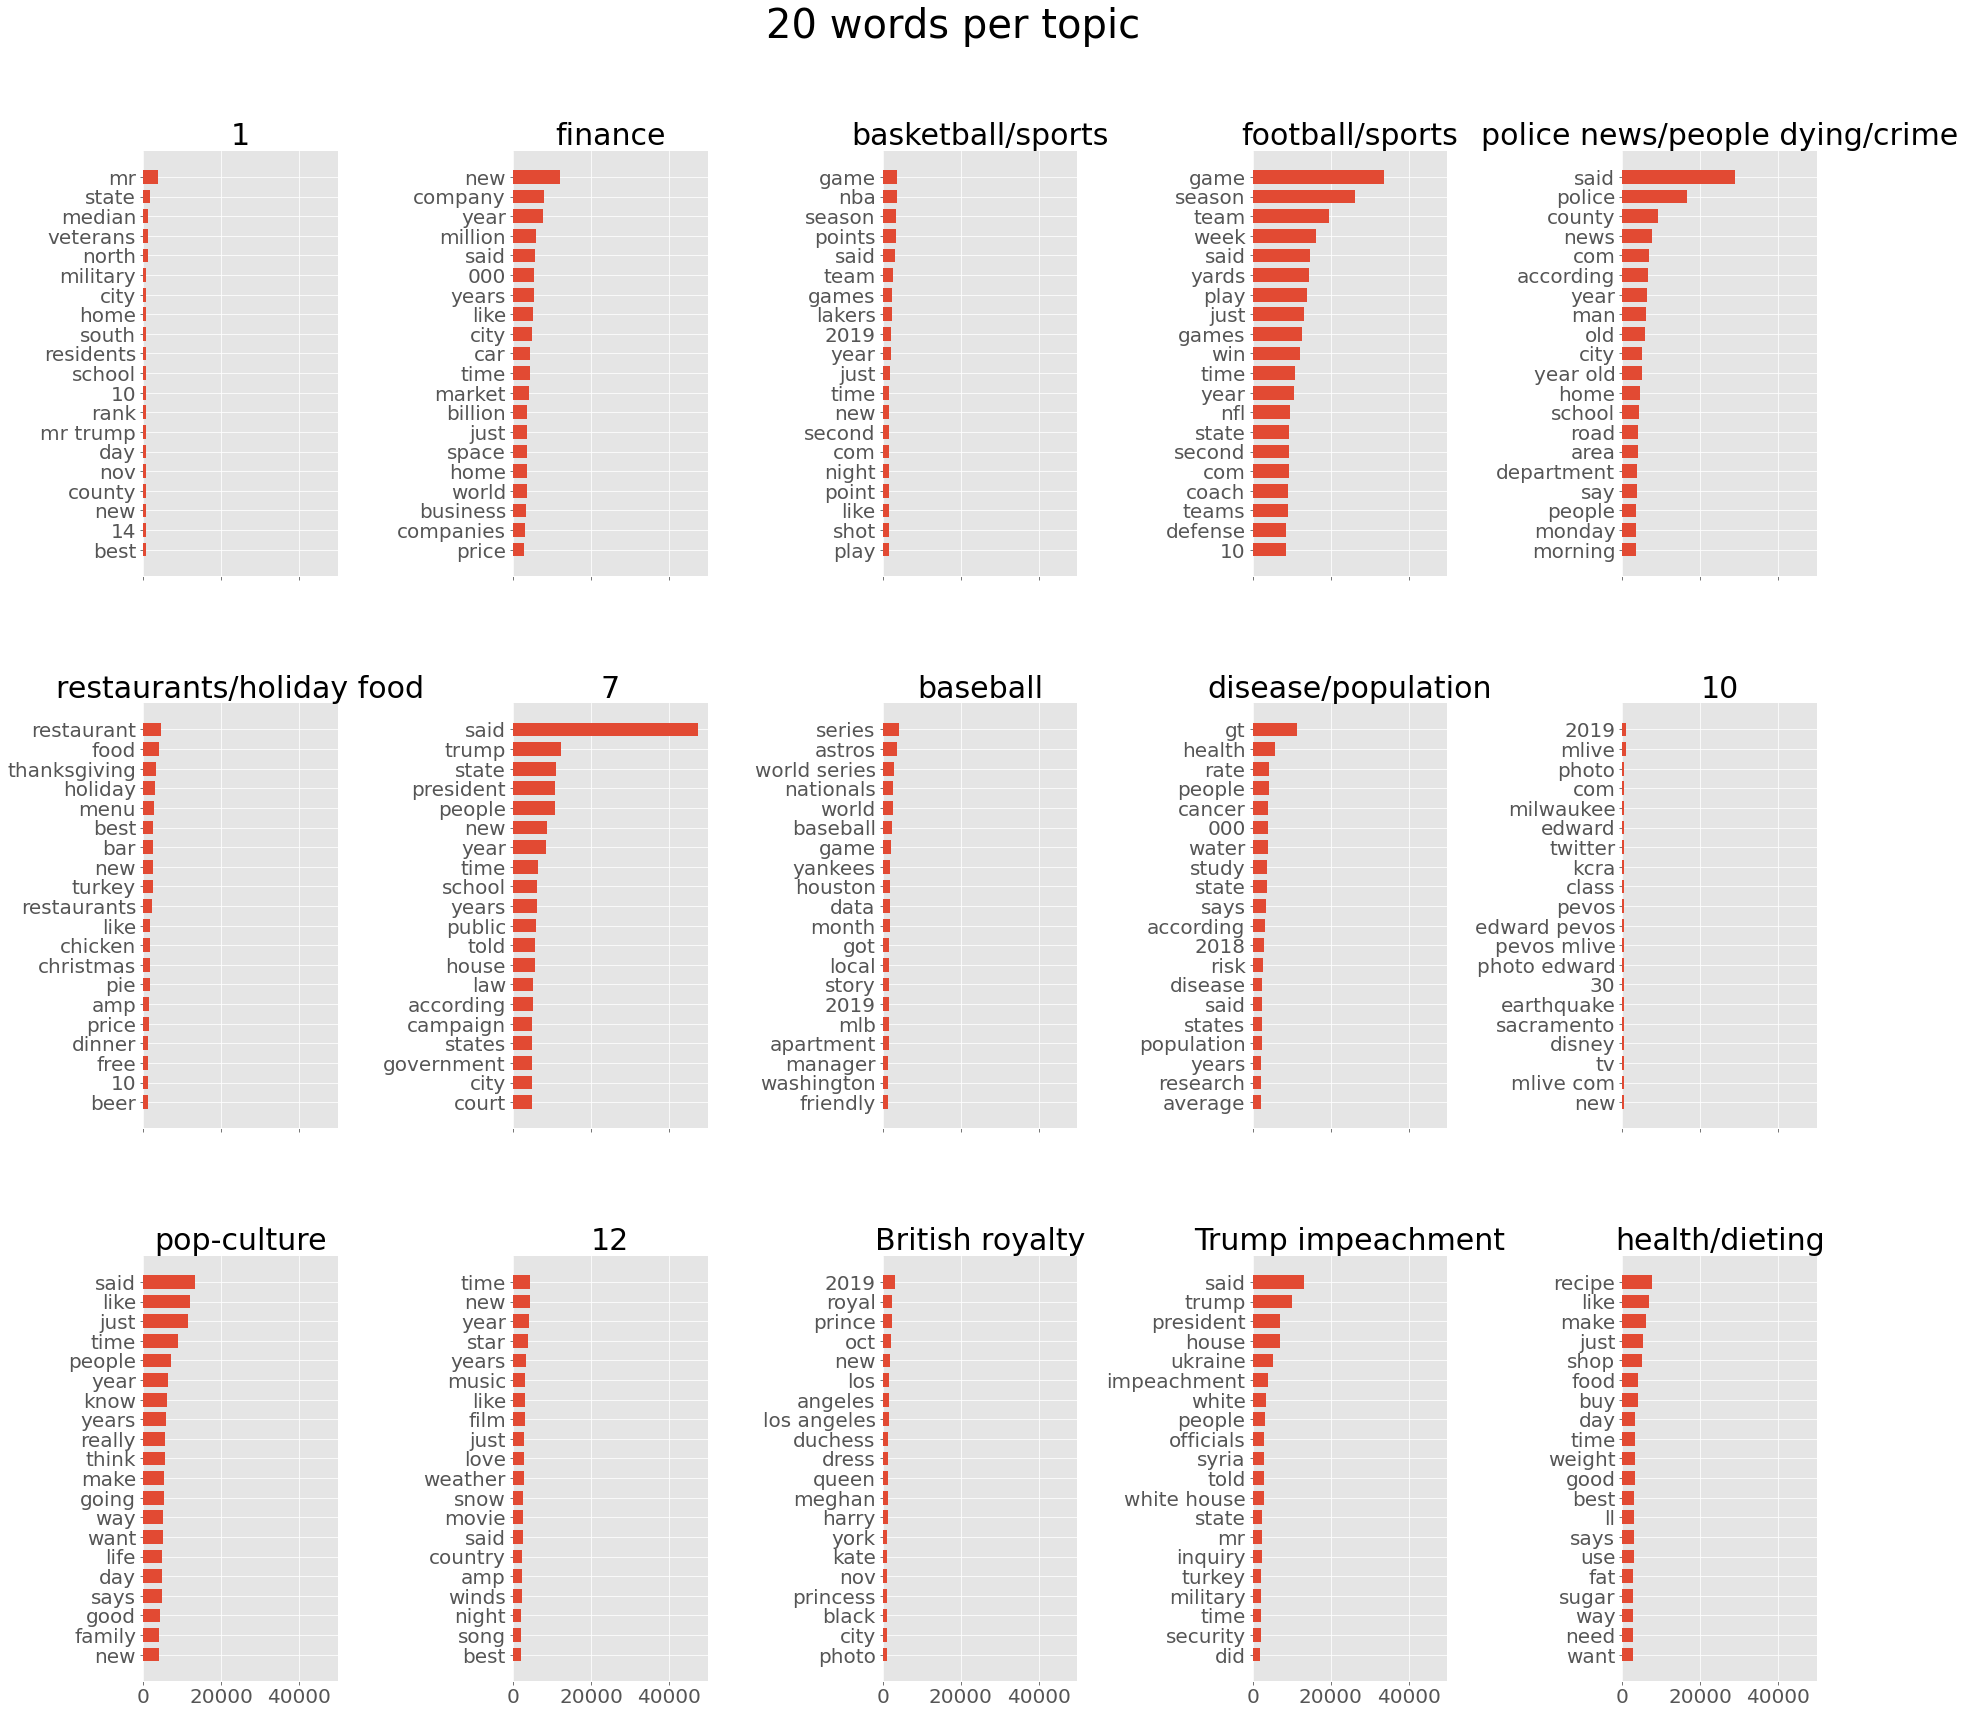

<Figure size 432x288 with 0 Axes>

In [167]:
plot_top_words(model, feature_names, topic_list, n_top_words=20)

In [ ]:
news_data

In [181]:
df[df.apply(lambda x: x > .5)].notna()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.544526
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.66316,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.528468,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,0.665135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43640,NaN,0.736026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43641,NaN,NaN,NaN,0.509375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.812884,NaN,NaN,NaN
43643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.652495,NaN,NaN,NaN,NaN


In [65]:
df = pd.DataFrame(create.feature_matrix)

In [158]:
for i in x[:50]:
    print(news_data.iloc[i]['title']  + '\n')

It's been Orlando's hottest October ever so far, but cooler temperatures on the way

Stars who got fired from major projects

The 23 Best TV Reboots of All Time

Can you answer these real Jeopardy questions about TV shows?

16 Live-Action Disney Movies in the Works After 'Maleficent: Mistress of Evil' (Photos)

TV shows we're most excited about for the rest of the year

40 Celebrity Mothers and Daughters at the Same Age

Don't Be Like These Celebrities Convicted of Tax Evasion

Must-see biopics

Fall Home Maintenance Checklist: 20 Things to Do Every Year

The surprising age differences between your favorite royal couples

Kanye West's 'Jesus is King' album still isn't here, fans aren't happy

The Eagles Soar and Perform 'Hotel California' For the First Time in Its Entirety in Las Vegas

Nestor bringing heavy rain to Southeast, mid-Atlantic after spawning tornadoes in Florida

José José, Legendary Mexican Singer, Dead at 71

Katy Perry's biggest career moments

15 Groundbreaking Female 

In [157]:
x = list(df[df.loc[:,11] > .4].index)

- 40k out of 43k have one topic with over .4 in the feature_matrix
    - assumption: documents genreally _do not_ have two topic with over .4 rating

In [2]:
news_data = pd.read_csv('../data/news_fresh.csv').drop('Unnamed: 0', axis=1)

In [3]:
user_data = pd.read_csv('../data/user_data.csv').drop('Unnamed: 0', axis=1)

In [3]:
feature_matrix = pd.read_csv('../data/LDA_matrix.csv').drop('Unnamed: 0', axis=1)

In [13]:
d = pd.read_csv('../data/TFIDF.csv')

In [ ]:
d

In [10]:
lst  = []
for i in range(1, 16):
    lst.append(str(i))

In [11]:
feature_matrix.columns = lst

In [12]:
feature_matrix

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.000018,0.078910,0.151009,0.000018,0.193268,0.001638,0.000018,0.000018,0.000018,0.550874,0.000018,0.005248,0.000018,0.000018,0.018912
1,0.000081,0.000081,0.016848,0.011605,0.000081,0.000081,0.119878,0.445842,0.000081,0.019459,0.000081,0.015396,0.000081,0.370327,0.000081
2,0.000098,0.000098,0.888434,0.061432,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.000098,0.048958,0.000098,0.000098,0.000098
3,0.000216,0.013516,0.118739,0.026945,0.687223,0.000216,0.000216,0.000216,0.000216,0.000216,0.000216,0.151412,0.000216,0.000216,0.000216
4,0.000160,0.000160,0.092304,0.767959,0.000160,0.000160,0.000160,0.121343,0.000160,0.000160,0.000160,0.016636,0.000160,0.000160,0.000160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43640,0.000368,0.000368,0.000368,0.000368,0.413188,0.000368,0.000368,0.000368,0.000368,0.000368,0.000368,0.000368,0.000368,0.000368,0.582023
43641,0.000274,0.000274,0.110376,0.000274,0.000274,0.000274,0.000274,0.000274,0.192199,0.000274,0.136700,0.000274,0.557707,0.000274,0.000274
43642,0.020853,0.036150,0.150612,0.000196,0.000196,0.000196,0.000196,0.000196,0.026256,0.000196,0.000196,0.764168,0.000196,0.000196,0.000196
43643,0.000256,0.042599,0.485750,0.062101,0.000256,0.000256,0.000256,0.000256,0.131325,0.000256,0.000256,0.163263,0.112655,0.000256,0.000256


In [5]:
recommender = ContentRecommender(news_data, user_data, feature_matrix)

In [41]:
pd.DataFrame(news_data[news_data['topic'] == 'LIFESTYLE']['title']).iloc[:10].values

array([["Kate Middleton's Best Hairstyles Through the Years"],
       ['10 Things You Never Knew About Owls'],
       ['Every outfit Duchess Kate has worn in 2019'],
       ["25 Photos of the Royal Family at Balmoral Castle, Queen Elizabeth's Favorite Home"],
       ["I'm Afraid to Tell My Male Bosses I'm Pregnant"],
       ["Prince George's Royal Life in Photos"],
       ["It's Not All About the Corgis - Here Are the Royal Family's Other Beloved Pets"],
       ['The Absolute Best One-piece Bathing Suits of 2019'],
       ['40 Things I Wish I Could Tell My Younger Self'],
       ['20 Words and Phrases You Had No Idea Were Coined in New York City']],
      dtype=object)

In [14]:
art_nums = ['N64589', 'N41775', 'N344', 'N62133', 'N61531', 'N28796', 'N54376', 'N3531', 'N11966','N43726', 'N42539', 'N22755', 'N59614', 'N20008', 'N53917', 'N5942', 'N45080', 'N1250', 'N18089', 'N11494']

In [35]:
topics = list(news_data[news_data['code'].apply(lambda x: x in art_nums)]['topic'].values)
tites = list(news_data[news_data['code'].apply(lambda x: x in art_nums)]['title'].values)



t = PrettyTable(['Topic', 'Title']) # create table of topic, interst level, and number recommended
z = 0
for topic, title in zip(topics, tites):
    t.add_row([topic, title])
print(t)
print('\n')

+-----------+--------------------------------------------------------------------------------------------------------------------------------------+
|   Topic   |                                                                Title                                                                 |
+-----------+--------------------------------------------------------------------------------------------------------------------------------------+
|   SPORTS  |                             Principal Tobias Harris? Sixers star dreams of career in education after NBA                             |
|    NEWS   |                                  Democratic debate: Going home to the heart of Ohio's Trump country                                  |
|   SPORTS  |                          Expert: NCAA payment of athletes may mean some for all, but the most for the stars                          |
|   SPORTS  |                         Former UM Star Says NCAA's Decision To Allow Student Athletes To Pro

In [6]:
recommender.evaulate_user(num_users=10)

+---------------+----------+-------------------+----+
|     topic     | Interest |         %         | #  |
+---------------+----------+-------------------+----+
|      News     |    M     |        36.0       | 8  |
|     Health    |    L     |        25.0       | 1  |
|    Finance    |    L     |        18.0       | 0  |
|   Lifestyle   |    VL    | 7.000000000000001 | 1  |
|     Travel    |    VL    |        4.0        | 0  |
|     Sports    |    VL    |        4.0        | 10 |
|  Food & Drink |    VL    |        2.0        | 0  |
|       Tv      |    VL    |        2.0        | 0  |
|      Cars     |    VL    |        1.0        | 0  |
|     Movies    |    VL    |        1.0        | 0  |
| Entertainment |    VL    |        1.0        | 0  |
+---------------+----------+-------------------+----+


      code      topic                                              title
0   N64589     SPORTS  Beloved Roosevelt High football coach fired fo...
1   N41775     SPORTS  Expert: NCAA paymen